# **TikTok**


# **Regression modeling**


**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.

*This Notebook has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?




# **PACE stages**

## **PACE: Plan**

### **Task 1. Imports and loading**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, RocCurveDisplay, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path_main = '/content/drive/MyDrive/Data Analytics/Main Projects/TikTok project/tiktok_dataset.csv'

data = pd.read_csv(file_path_main)

## **PACE: Analyze**


* What are some purposes of EDA before constructing a logistic regression model?

1. to identify data anomalies such as outliers and class imbalance that might affect the modeling;

2. to verify model assumptions such as no severe multicollinearity.

### **Task 2a. Explore data with EDA**


Getting basic dataframe information:

In [4]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
data.shape

(19382, 12)

In [6]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [8]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Handling null values:

In [12]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [13]:
df = data.dropna(axis=0).copy()

In [14]:
df.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

Checking for and handling duplicates:

In [15]:
df.duplicated().sum()

0

Checking for and handling outliers:

In [16]:
relevant_cols = ["video_duration_sec","video_view_count","video_like_count","video_comment_count"]

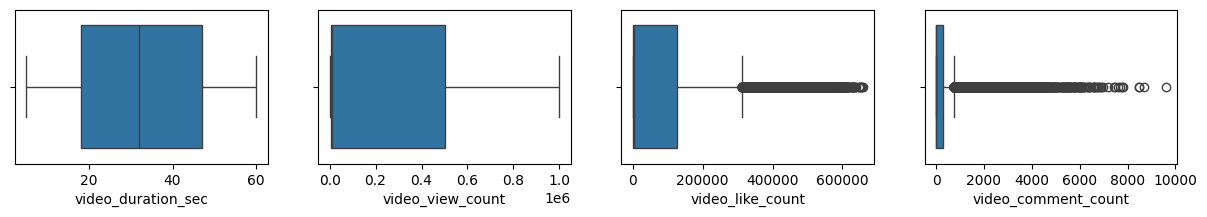

In [17]:
def boxplots(columns_list):
    fig,axes = plt.subplots(1,len(columns_list),figsize=(15,2))
    for i, col in enumerate(columns_list):
        sns.boxplot(x=df[col],ax=axes[i])
    plt.show()
boxplots(relevant_cols)

In [18]:
def outlier_handler(column_list,iqr_factor):
    for col in column_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + iqr_factor*iqr
        df.loc[df[col]>upper_limit,col] = upper_limit
        print(f"{col} - Upper limit: {upper_limit}")

video_like_count - Upper limit: 311333.875
video_comment_count - Upper limit: 728.5


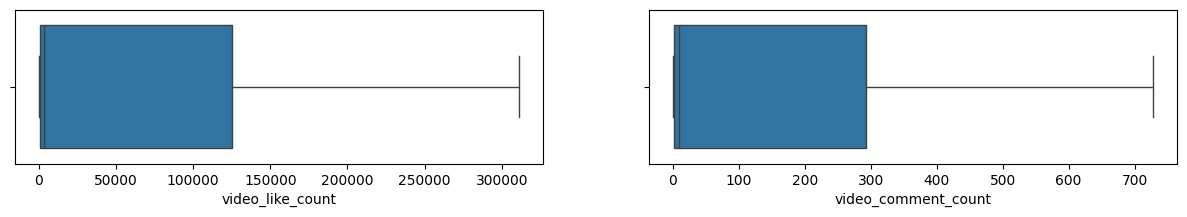

In [19]:
outlier_handler(relevant_cols[2:],1.5)
boxplots(relevant_cols[2:])

Checking class balance:

In [20]:
df["verified_status"].value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

In [21]:
df["verified_status"].value_counts()

not verified    17884
verified         1200
Name: verified_status, dtype: int64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Using resampling to create class balance in the outcome variable:

In [22]:
minority_df = df[df["verified_status"] == "verified"]
mayority_df = df[df["verified_status"] == "not verified"]

minority_df_upsampled = resample(minority_df,
                                    replace=True,                 # to sample with replacement
                                     n_samples=len(mayority_df), # to match majority class
                                     random_state=0)

df_upsampled = pd.concat([minority_df_upsampled,mayority_df]).reset_index(drop=True)

df_upsampled["verified_status"].value_counts()

verified        17884
not verified    17884
Name: verified_status, dtype: int64

Extracting the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model:



In [23]:
df_upsampled["len_transcript"] = df_upsampled["video_transcription_text"].apply(lambda x: len(str(x)))
df_upsampled.head(2)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,len_transcript
0,14015,opinion,5381182853,58,my friends' impression is that a candle’s flam...,verified,active,154.0,36.0,2.0,1.0,0.0,71
1,12805,opinion,2524108154,29,our impression is that the hummingbird is the ...,verified,active,9565.0,1505.0,593.0,14.0,2.0,78


Getting the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts:

In [24]:
df_upsampled.groupby(["verified_status"])["len_transcript"].mean()

verified_status
not verified    89.401141
verified        84.569559
Name: len_transcript, dtype: float64

Visualizing the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts:

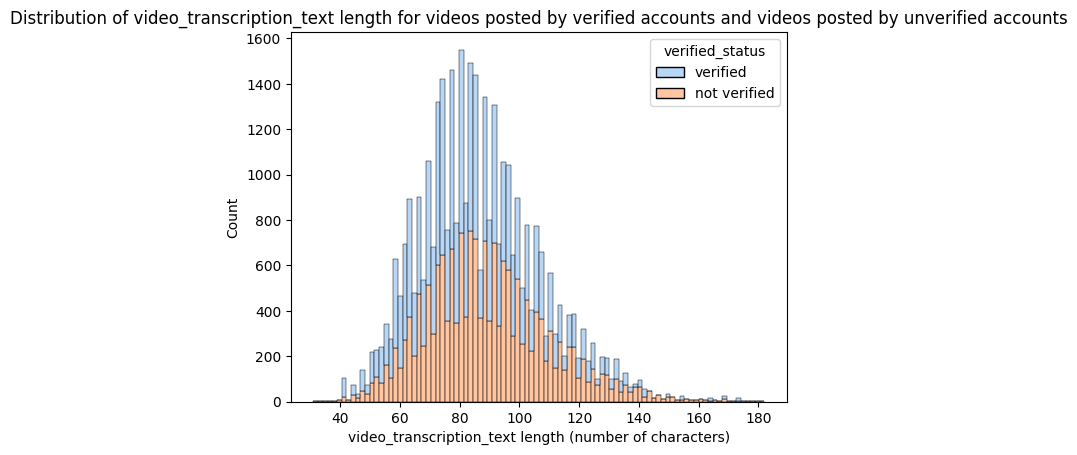

In [25]:
sns.histplot(data=df_upsampled, stat="count", multiple="stack", x="len_transcript", kde=False, palette="pastel",
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

### **Task 2b. Examine correlations**

Coding a correlation matrix to help determine most correlated variables:

In [26]:
df_upsampled.corr(method='pearson',numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,len_transcript
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626385,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.626385,0.005993,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
len_transcript,-0.193677,-0.007083,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


Visualizing a correlation heatmap of the data:

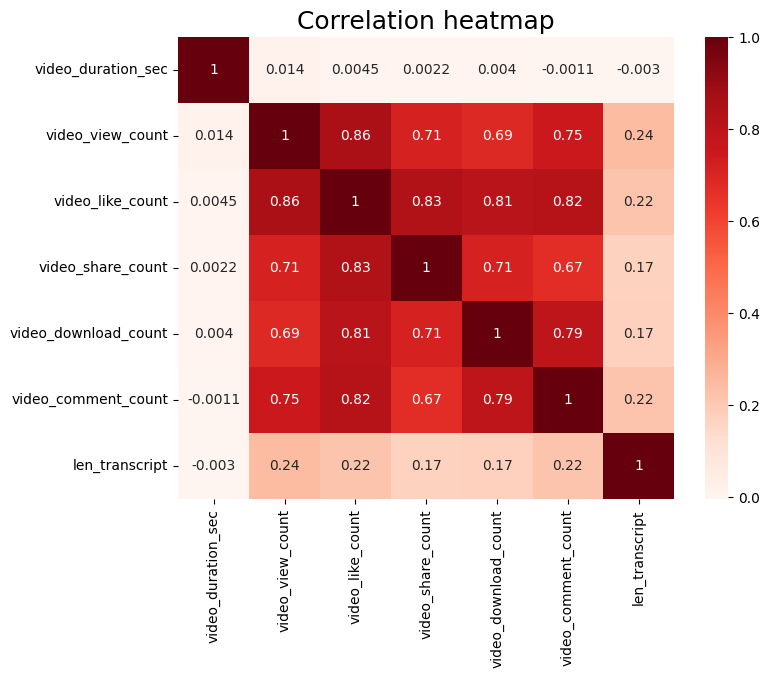

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count",
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "len_transcript"]].corr(numeric_only=True), annot=True, cmap='Reds')
plt.title('Correlation heatmap',fontsize=18)
plt.show()


**Question:** What variables are shown to be correlated in the heatmap?

* One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, we could exclude `video_like_count`. And among the variables that quantify video metrics, `video_view_count`, `video_share_count`, `video_download_count`, and `video_comment_count` could be kept as features.

## **PACE: Construct**


### **Task 3a. Select variables**

Setting Y and X variables:

In [28]:
y = df_upsampled["verified_status"]

In [29]:
X = df_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]
X.head()


,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,58,opinion,active,154.0,2.0,1.0,0.0
1,29,opinion,active,9565.0,593.0,14.0,2.0
2,25,opinion,active,9351.0,62.0,14.0,2.0
3,24,opinion,active,7361.0,207.0,1.0,0.0
4,17,opinion,active,1528.0,20.0,1.0,0.0


### **Task 3b. Train-test split**

Splitting the data into training and testing sets:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

Confirming that the dimensions of the training and testing sets are in alignment:

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

### **Task 3c. Encode variables**

Checking the data types of the features:

In [32]:
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [33]:
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [34]:
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

Selecting the training features that needs to be encoded:

In [35]:
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,claim,active
25583,claim,under review
18474,claim,active
27312,opinion,active


As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encoding categorical features in the training set:

In [36]:
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [37]:
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [38]:
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [39]:
X_train_encoded[:5]

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.]])

Placing encoded training features (which is currently an array) into a dataframe:

In [40]:
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


Displaying first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric):

In [41]:
X_train_drop = X_train.drop(columns=["claim_status","author_ban_status"]).reset_index(drop=True)
X_train_drop.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
0,14,6413.0,561.0,51.0,11.0
1,50,26660.0,27.0,49.0,25.0
2,38,734618.0,140356.0,1277.0,292.0
3,54,718521.0,74616.0,2829.0,728.5
4,45,2507.0,6.0,1.0,0.0


Concatenating `X_train_drop` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`):

In [42]:
X_train_final = pd.concat([X_train_drop,X_train_encoded_df],axis=1)

X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,14,6413.0,561.0,51.0,11.0,1.0,0.0,0.0
1,50,26660.0,27.0,49.0,25.0,0.0,0.0,0.0
2,38,734618.0,140356.0,1277.0,292.0,0.0,0.0,1.0
3,54,718521.0,74616.0,2829.0,728.5,0.0,0.0,0.0
4,45,2507.0,6.0,1.0,0.0,1.0,0.0,0.0


Checking the data type of the outcome variable:

In [43]:
y_train.dtypes

dtype('O')

In [ ]:
y_train[:5]

33058    not verified
20491    not verified
25583    not verified
18474    not verified
27312    not verified
Name: verified_status, dtype: object

In [44]:
y_train.unique()

array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encoding categorical values of the outcome variable the training set using an appropriate method:

In [45]:
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [46]:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model

y_train_to_encode = y_train.values.reshape(-1, 1)
y_train_final = y_encoder.fit_transform(y_train_to_encode).ravel()
y_encoder.get_feature_names_out()

array(['x0_verified'], dtype=object)

In [47]:
y_train_final[:5]

array([0., 0., 0., 0., 0.])

### **Task 3d. Model building**

Constructing a model and fitting it to the training set:

In [48]:
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

Geting the feature names from the model and the model coefficients (which represent log-odds ratios):

Text(0.5, 1.0, 'Feature importance')

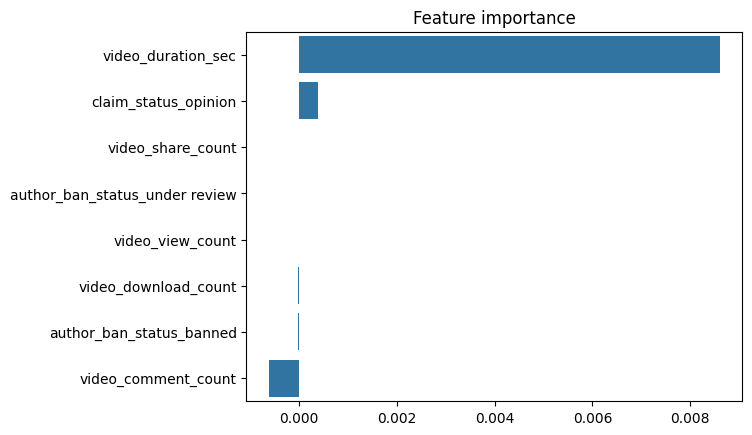

In [66]:
feature_importance = list(zip(X_train_final.columns, log_clf.coef_[0]))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance')

1. **`video_duration_sec`:**
   - For this feature, the coefficient is positive (0.008607547648283776), indicating that an increase in the video duration is associated with an increase in the logarithm of the odds ratio of the event occurring.
   - However, to understand the exact effect in terms of probabilities, you would need to apply the exponential function to the coefficient. This is because the logarithm of odds is related to probabilities through the exponential function.
   - In general terms, an increase of one second in the video duration is associated with an increase of approximately \( e^{0.008607547648283776} \) times in the odds (or probability ratio) of the event occurring, holding all other features constant. Here, \( e \) is the base of the natural logarithm.


Verifying the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

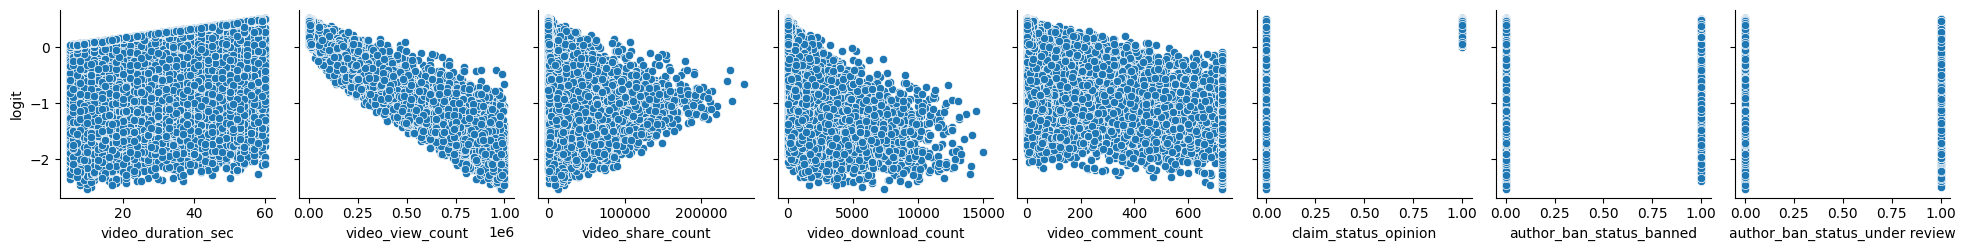

In [67]:
logit_data = X_train_final.copy()
training_probabilities = log_clf.predict_proba(X_train_final)
logit_data["logit"] =  [np.log(prob[1] / prob[0]) for prob in training_probabilities]
pairplot = sns.pairplot(logit_data, y_vars=['logit'], x_vars=logit_data.columns[:-1])

for i in range(len(logit_data.columns) - 1):
    pairplot.axes[0, i].set_ylabel('logit')
    pairplot.axes[-1, i].set_xlabel(logit_data.columns[i])

plt.show()

* Observing non-linear relationships in the pair plot could suggest that the logistic regression model may not be the most suitable for capturing the relationship between predictor variables and the target variable. In such cases, exploring more flexible models capable of capturing non-linear relationships, such as polynomial regression models, decision tree models, or support vector machine (SVM) regression models, among others, may be warranted.

* It's important to carefully examine these non-linear relationships and consider how they may impact the accuracy and interpretation of the model. However, it's worth noting that the presence of non-linear relationships doesn't necessarily mean that the logistic regression model is not useful, but rather that the relationship between variables may be more complex than what a linear model can capture.

## **PACE: Execute**


### **Taks 4a. Results and evaluation**


Encoding categorical features in the testing:

In [49]:
X_test_to_enconde = X_test[["claim_status", "author_ban_status"]]
X_test_to_enconde.head()

,claim_status,author_ban_status
21061,claim,active
31748,opinion,active
20197,claim,banned
5727,opinion,active
11607,opinion,active


In [50]:
X_test_encoded = X_encoder.fit_transform(X_test_to_enconde)
X_test_encoded[:5]


array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [51]:
X_test_enconded_df = pd.DataFrame(data = X_test_encoded,columns=X_encoder.get_feature_names_out())
X_test_enconded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [52]:
X_test_drop = X_test.drop(columns=["claim_status","author_ban_status"]).reset_index(drop=True)
X_test_drop.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
0,35,201293.0,22845.0,2681.0,728.5
1,6,9046.0,397.0,35.0,2.0
2,56,986459.0,87446.0,8390.0,728.5
3,22,6748.0,387.0,37.0,4.0
4,56,7329.0,88.0,4.0,0.0


In [53]:
X_test_final = pd.concat([X_test_drop,X_test_enconded_df],axis=1)
X_test_final.head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,35,201293.0,22845.0,2681.0,728.5,0.0,0.0,0.0
1,6,9046.0,397.0,35.0,2.0,1.0,0.0,0.0
2,56,986459.0,87446.0,8390.0,728.5,0.0,1.0,0.0
3,22,6748.0,387.0,37.0,4.0,1.0,0.0,0.0
4,56,7329.0,88.0,4.0,0.0,1.0,0.0,0.0


### Testing the logistic regression model


In [55]:
y_predictions = log_clf.predict(X_test_final)
y_predictions[:5]

array([0., 1., 0., 1., 1.])

Displaying the true labels of the testing set:

In [56]:
y_test[:5]

21061    not verified
31748    not verified
20197    not verified
5727         verified
11607        verified
Name: verified_status, dtype: object

Encoding the true labels of the testing set so it can be compared to the predictions:

In [57]:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_to_encode = y_test.values.reshape(-1, 1)
y_test_final = y_encoder.fit_transform(y_test_to_encode).ravel()

y_test_final

array([0., 0., 0., ..., 1., 0., 0.])

Confirming again that the dimensions of the training and testing sets are in alignment since additional features were added:

In [58]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

### **Task 4b. Visualize model results**

Creating a confusion matrix to visualize the results of the logistic regression model:

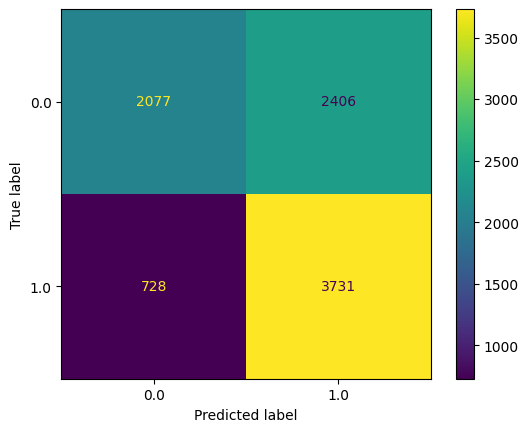

In [59]:
cm = confusion_matrix(y_test_final,y_predictions,labels=log_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_clf.classes_)
disp.plot()
plt.show()

In [60]:
print("Accuracy :",(3731 + 2077) / (3731 + 2077 + 728 + 2406))

Accuracy : 0.649519123238649


The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

### Creating a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model:

In [62]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_predictions, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.46      0.57      4483
not verified       0.61      0.84      0.70      4459

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



The classification report above shows that the logistic regression model achieved a precision of 61% and a recall of 84%, and it achieved an accuracy of 65%. Note that the precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

### Creating a ROC curve:

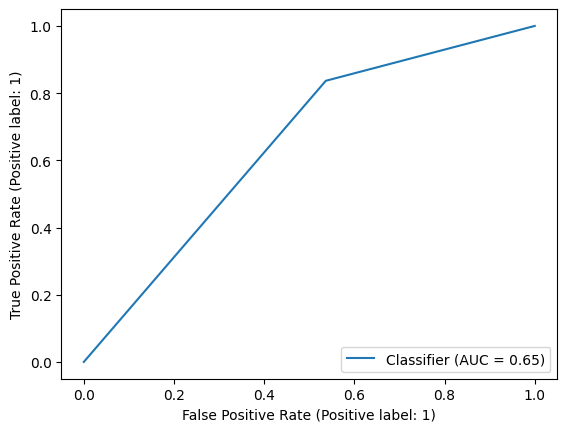

In [63]:
RocCurveDisplay.from_predictions(y_test_final,y_predictions)

An AUC of 0.65 indicates that the model's ability to distinguish between positive and negative classes is better than random guessing, but it's not excellent.

### **Task 4c. Conclusion**


Key takeaways:

- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.0086 increase in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a precision of 61% is less than ideal, but a recall of 84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable.
- The pair plot visualizes potential non-linear relationships between predictor variables and the target variable, suggesting that logistic regression might not fully capture the complexity of the relationship, prompting consideration of more flexible modeling approaches.

We developed a logistic regression model for verified status based on video features. The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.